In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1. Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # Normalize pixel values
y = mnist.target.astype(int)

In [6]:
# Split into training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 2. Initialize RBM and Logistic Regression
rbm = BernoulliRBM(
    n_components=256, 
    learning_rate=0.06, 
    n_iter=10, 
    random_state=42, 
    verbose=1)

logistic = LogisticRegression(
                        max_iter=1000, 
                        solver='lbfgs', 
                        multi_class='multinomial'
                        )

In [5]:
# 3. Create Pipeline: RBM + Logistic Regression
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])


In [7]:
# 4. Train the model
print("Training RBM + Logistic Regression")
classifier.fit(X_train, y_train)

Training RBM + Logistic Regression
[BernoulliRBM] Iteration 1, pseudo-likelihood = -85.99, time = 32.65s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -80.53, time = 45.89s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -80.72, time = 43.35s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -78.04, time = 39.17s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -78.14, time = 34.41s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -79.27, time = 34.98s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -75.22, time = 36.81s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -75.00, time = 56.17s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -75.46, time = 26.35s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -75.35, time = 25.05s


/Users/deepak/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('rbm', ...), ('logistic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_components,256
,learning_rate,0.06
,batch_size,10
,n_iter,10
,verbose,1
,random_state,42
,penalty,'l2'


In [8]:
# 5. Evaluate the model
y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.95      0.94      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.95      0.96      0.95      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.95      0.96      1503
           8       0.93      0.93      0.93      1357
           9       0.93      0.95      0.94      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Confusion Matrix:
[[1316    1    5    0    2    3    7    2    4    3]
 [   0 1577    5    1    3    1    0    4    8    1]
 [   1    6 1332    5    8    2    4    5   12    5]
 [   1    2   13 1344    2   29    1    8

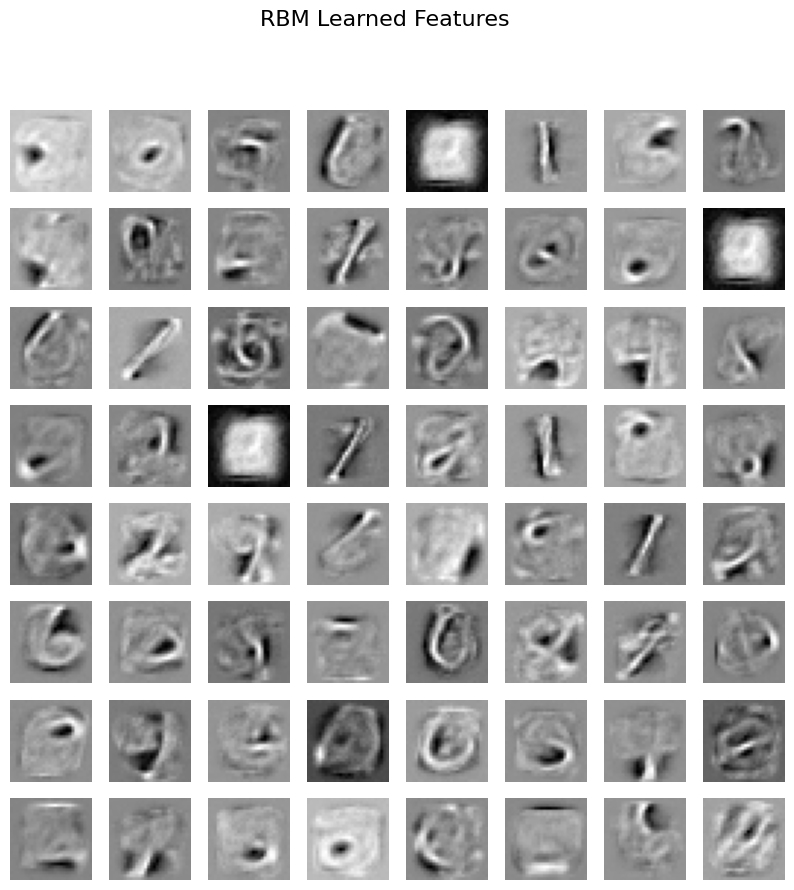

In [10]:
# 6. Visualize RBM Learned Features
components = rbm.components_
plt.figure(figsize=(10, 10))
for i, comp in enumerate(components[:64]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(comp.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('RBM Learned Features', fontsize=16)
plt.show()